In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Score1', 'Score2', 'Decision'])
data.head()

,Score1,Score2,Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


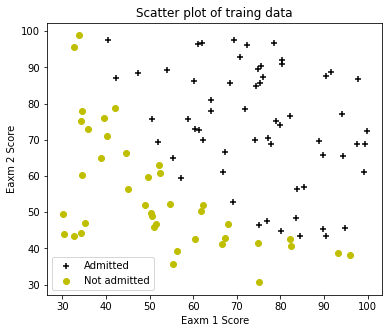

In [3]:
admitted = data[data.Decision == 1]
not_admitted = data[data.Decision == 0]

add_score1 = admitted['Score1'].to_numpy()
add_score2 = admitted['Score2'].to_numpy()

not_add_score1 = not_admitted['Score1'].to_numpy()
not_add_score2 = not_admitted['Score2'].to_numpy()

plt.figure(figsize=(6, 5))
plt.scatter(add_score1, add_score2, marker='+', color='k', label='Admitted')
plt.scatter(not_add_score1, not_add_score2, marker='o', color='y', label='Not admitted')
plt.xlabel('Eaxm 1 Score')
plt.ylabel('Eaxm 2 Score')
plt.title('Scatter plot of traing data')
plt.legend()

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 单个的数或者numpy数组

a = np.zeros((2, 2))
sigmoid(a), sigmoid(0)

(array([[0.5, 0.5],
        [0.5, 0.5]]),
 0.5)

In [5]:
data.insert(0, 'One', 1)
data.head()

,One,Score1,Score2,Decision
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [6]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
X = X.to_numpy()
y = y.to_numpy()
theta = np.zeros(3) 

In [7]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [8]:
# 计算代价J(theta)
def cost_function(theta, X, y):
    theta = theta.reshape(1, theta.shape[0])
    h = sigmoid(X @ theta.T)
    m = X.shape[0]
    temp = -y * np.log(h) - (1 - y) * np.log(1-h)
    return  np.sum(temp) / m

cost_function(theta, X, y)

0.6931471805599453

In [9]:
# 计算梯度,theta必须作为第一个参数，下面的fmin_tnc才能正常运行
def gradient_function(theta, X, y): 
    num_params = theta.shape[0]
    grad = np.zeros(num_params)
    theta = theta.reshape(1, theta.shape[0])
    for i in range(num_params):
        part1 = sigmoid(X @ theta.T) - y 
        part2 = part1 * X[:, i].reshape(X.shape[0], 1)
        grad[i] = np.sum(part2) / X.shape[0]
    return grad

grad =  gradient_function(theta, X, y)        
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [10]:
# 使用 scipy's truncated newton 寻找最优参数， x0必须是一维的array
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient_function, args=(X, y))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631536E-01   7.89087138E-01
    2    5  5.892425222593011E-01   7.39226590E+01
    3    7  4.227824082768085E-01   1.85265802E+01
    4    9  4.072926971534283E-01   1.68671130E+01
    5   11  3.818854919624440E-01   1.07735097E+01
    6   13  3.786234896003143E-01   2.31584926E+01
tnc: stepmx = 1000
    7   16  2.389268293525134E-01   3.00822031E+00
    8   18  2.047203891739633E-01   1.52227715E-01
    9   20  2.046713899224319E-01   6.62495126E-02
   10   22  2.035303163220451E-01   9.30780759E-04
tnc: fscale = 32.7775
   11   24  2.035293522130718E-01   8.07207549E-06
   12   26  2.035251114060307E-01   1.80213134E-04
   13   28  2.034984106064758E-01   5.02851845E-04
   14   30  2.034978379554757E-01   9.89948021E-06
   15   32  2.034977905988409E-01   3.77273624E-06
   16   34  2.034977387158876E-01   1.94311273E-05
   17   36  2.034977015894748E-01   2.40927779E-13


(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)

In [11]:
cost_function(result[0], X, y)

0.20349770158947483

In [12]:
# prediction: Score1=45, Score2=85
predic = sigmoid(np.array([[1, 45, 85]]) @ result[0])
predic

array([0.77629062])

In [13]:
def prediction(theta, X):
    output = sigmoid(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in output]

In [14]:
final_theta = result[0]
predictions = prediction(final_theta, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = np.sum(correct) / len(correct) * 100
print(f"accuracy = {accuracy}%")

accuracy = 89.0%


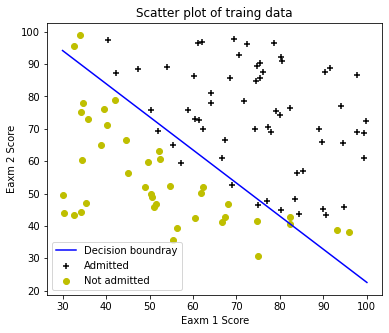

In [15]:
# 绘制决策边界，令theta0 + theta1 * x1 + theta2 * x2 = 0
boundary_x = np.linspace(30, 100, 100)
boundary_y = -(final_theta[0] + final_theta[1] * boundary_x) / final_theta[2]
plt.figure(figsize=(6, 5))
plt.scatter(add_score1, add_score2, marker='+', color='k', label='Admitted')
plt.scatter(not_add_score1, not_add_score2, marker='o', color='y', label='Not admitted')
plt.plot(boundary_x, boundary_y, 'b', label='Decision boundray')
plt.xlabel('Eaxm 1 Score')
plt.ylabel('Eaxm 2 Score')
plt.title('Scatter plot of traing data')
plt.legend()

In [16]:
path2 = 'ex2data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Test1', 'Test2', 'Decision'])
data2.head()

,Test1,Test2,Decision
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


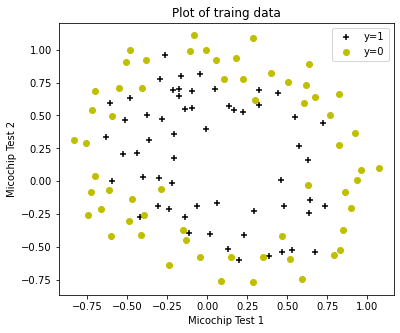

In [17]:
accepted = data2[data2.Decision == 1]
rejected = data2[data2.Decision == 0]

acc_test1 = accepted['Test1'].to_numpy()
acc_test2= accepted['Test2'].to_numpy()

rej_test1 = rejected['Test1'].to_numpy()
rej_test2 = rejected['Test2'].to_numpy()

plt.figure(figsize=(6, 5))
plt.scatter(acc_test1, acc_test2, marker='+', color='k', label='y=1')
plt.scatter(rej_test1, rej_test2, marker='o', color='y', label='y=0')
plt.xlabel('Micochip Test 1')
plt.ylabel('Micochip Test 2')
plt.title('Plot of traing data')
plt.legend()

In [18]:
# Feature mapping（特征映射），每个元素包含28个特征
   
degree = 6
x1 = data2['Test1']
x2 = data2['Test2']

data2.insert(3, 'One', 1)


for i in range(1, degree + 1):
    for j in range(0, i + 1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i - j) * np.power(x2, j)

data2.drop('Test1', axis=1, inplace=True) # 删除原来的两列
data2.drop('Test2', axis=1, inplace=True)
data2.head()

,Decision,One,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [19]:
cols2 = data2.shape[1]
X2 = data2.iloc[:, 1:cols2]
y2 = data2.iloc[:, 0:1]
X2 = X2.to_numpy()
y2 = y2.to_numpy()
theta2 = np.zeros(X2.shape[1])
X2.shape

(118, 28)

In [20]:
lambda_reg = 1

In [21]:
# 计算代价J(theta)
def cost_function_reg(theta, X, y, lambda_reg):
    theta = theta.reshape(1, theta.shape[0])
    h = sigmoid(X @ theta.T)
    m = X.shape[0]
    temp1 = -y * np.log(h) - (1 - y) * np.log(1-h)
    temp2 = (theta**2)[:, 1:]
    return  np.sum(temp1) / m + lambda_reg * np.sum(temp2) / (2 * m)

cost_function_reg(theta2, X2, y2, lambda_reg)

0.6931471805599454

In [22]:
# 计算梯度,theta必须作为第一个参数，下面的fmin_tnc才能正常运行
def gradient_function_reg(theta, X, y, lambda_reg): 
    num_params = theta.shape[0]
    grad = np.zeros(num_params)
    theta = theta.reshape(1, theta.shape[0])
    part1 = sigmoid(X @ theta.T) - y 
    for i in range(num_params):
        part2 = part1 * X[:, i].reshape(X.shape[0], 1)
        if i == 0:
            grad[i] = np.sum(part2) / X.shape[0]
        else:
            grad[i] = np.sum(part2) / X.shape[0] + lambda_reg * theta[0, i] / X.shape[0]
    return grad

grad2 =  gradient_function_reg(theta2, X2, y2, lambda_reg)        
grad2

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [23]:
result2 = opt.fmin_tnc(func=cost_function_reg, x0=theta2, fprime=gradient_function_reg, args=(X2, y2, lambda_reg))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
        -1.45817009, -0.05098418, -0.61558552, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603297, -0.04466178, -0.27778952, -0.29539514,
        -0.45645982, -1.04319155,  0.02779373, -0.29244872,  0.01555761,
        -0.32742406, -0.1438915 , -0.92467487]),
 32,
 1)

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    6  5.360726284899101E-01   9.47411926E-04
tnc: fscale = 32.4886
    2   11  5.291073385279930E-01   1.47908523E-05
    3   14  5.290104044669249E-01   3.98099041E-07
tnc: fscale = 1584.91
    4   19  5.290029439300048E-01   6.89678486E-09
    5   22  5.290028141690889E-01   3.25708526E-09
    6   27  5.290027426721703E-01   1.38869540E-09
tnc: |fn-fn-1] = 1.27077e-08 -> convergence
    7   32  5.290027299644846E-01   1.16962607E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [24]:
final_theta2 = np.array(result2[0])
predictions = prediction(final_theta2, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = np.sum(correct) / len(correct) * 100
print(f"accuracy = {accuracy}%")

accuracy = 83.05084745762711%


In [25]:
def map_feature(x1, x2):
    out = np.ones((1, 28))
    num = 1
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            out[0,num] = np.power(x1, i - j) * np.power(x2, j)  # 注意num的起始下标为[0,1]
            num +=1
    return out

map_feature(1, 2)

array([[ 1.,  1.,  2.,  1.,  2.,  4.,  1.,  2.,  4.,  8.,  1.,  2.,  4.,
         8., 16.,  1.,  2.,  4.,  8., 16., 32.,  1.,  2.,  4.,  8., 16.,
        32., 64.]])

In [26]:
def plot_decission_boundary(X, y, theta, lamda):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(u.shape[0]):
        for j in range(v.shape[0]):
            z[i,j] = map_feature(u[i], v[j])@theta.T
    z = z.T
    cs = plt.contour(u, v, z, [0], colors='b')
    plt.clabel(cs, cs.levels, inline=True, fmt=f'λ={lamda}', fontsize=10)  #设置label:λ=1
    cs.collections[0].set_label('Decision Boundary')  # 设置legend图例
    plt.legend()

In [27]:
def plot_data_mircochip(x, y, u, v):
    plt.figure(figsize=(6, 5))
    plt.scatter(acc_test1, acc_test2, marker='+', color='k', label='y=1')
    plt.scatter(rej_test1, rej_test2, marker='o', color='y', label='y=0')
    plt.xlabel('Micochip Test 1')
    plt.ylabel('Micochip Test 2')
    plt.title('Plot of traing data')
    plt.legend()  

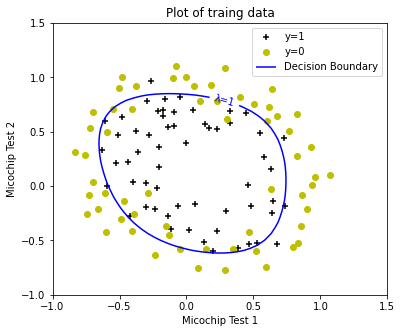

In [28]:
plot_data_mircochip(acc_test1, acc_test2, rej_test1, rej_test2)
plot_decission_boundary(X2, y, final_theta2, 1)

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
tnc: stepmx = 1000
    1    7  3.769296914526055E-01   2.82103170E-03
    2   11  3.576202764108259E-01   1.61492923E-04
tnc: fscale = 78.6907
    3   20  3.265308237344827E-01   2.45784571E-05
    4   23  3.218671648254835E-01   2.81581741E-05
    5   34  3.096071816519677E-01   2.48037116E-05
    6   43  3.011858036798989E-01   2.69025136E-05
    7   46  2.993250008519283E-01   1.39256010E-05
    8   63  2.907322248593713E-01   4.45470948E-06
    9   67  2.898723970726549E-01   9.76633087E-06
   10   79  2.848803832076504E-01   1.84937425E-06
   11   84  2.838669064044154E-01   2.05693055E-06
   12   93  2.819359129901142E-01   1.05864194E-06
   13  106  2.795831230778745E-01   5.49105835E-06
   14  109  2.794227563139132E-01   1.61191638E-06
   15  114  2.789563413823271E-01   1.43616228E-06
   16  127  2.754042931194474E-01   6.44770707E-06
   17  139  2.735021794977287E-01   2.50073768E-07


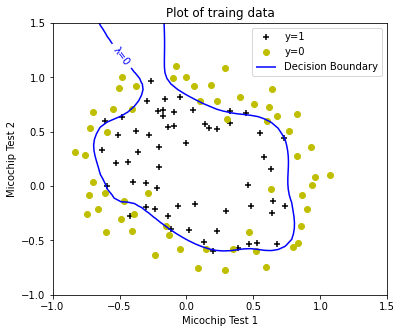

In [29]:
lambda_reg = 0
result3 = opt.fmin_tnc(func=cost_function_reg, x0=theta2, fprime=gradient_function_reg, args=(X2, y2, lambda_reg))
final_theta3 =  np.array(result3[0])
plot_data_mircochip(acc_test1, acc_test2, rej_test1, rej_test2)
plot_decission_boundary(X2, y, final_theta3, lambda_reg)

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    4  6.865362017422595E-01   3.38580152E-05
tnc: fscale = 171.858
    2    8  6.864838347936327E-01   1.72447190E-09
tnc: fscale = 24080.9
tnc: |fn-fn-1] = 9.20931e-10 -> convergence
    3   11  6.864838338727015E-01   6.16443245E-14
tnc: Converged (|f_n-f_(n-1)| ~= 0)


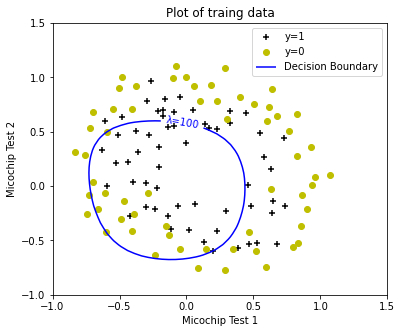

In [30]:
lambda_reg = 100
result3 = opt.fmin_tnc(func=cost_function_reg, x0=theta2, fprime=gradient_function_reg, args=(X2, y2, lambda_reg))
final_theta3 =  np.array(result3[0])
plot_data_mircochip(acc_test1, acc_test2, rej_test1, rej_test2)
plot_decission_boundary(X2, y, final_theta3, lambda_reg)